<a href="https://colab.research.google.com/github/halaaab/IT_326-Project-Group-1/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[1] Problem**

Breast cancer is one of the most common cancers affecting women worldwide. Early and accurate diagnosis is crucial for improving treatment outcomes and patient survival rates.
This project aims to analyze a dataset containing features computed from digitized images of fine-needle aspirates (FNA) of breast masses. By applying classification and clustering techniques, we aim to predict whether a tumor is malignant or benign, and to explore patterns and similarities among cases to gain deeper insights into the characteristics of cancerous and non-cancerous cells.

**[2] Data Mining Task**

In this project, we apply two essential data mining techniques: classification and clustering, to predict and better understand breast cancer diagnosis.
For classification, we train a Decision Tree model using features extracted from digitized images of fine-needle aspirates (FNA) of breast masses. These features — such as mean radius, texture, smoothness, compactness, and symmetry — describe the characteristics of cell nuclei.
The goal is to predict whether a tumor is malignant or benign, making this a binary classification problem. The Decision Tree approach is used to learn interpretable rules that can support medical diagnosis and decision-making.
For clustering, we apply the K-Means algorithm to group samples with similar feature patterns without using the diagnosis label. This unsupervised analysis helps uncover hidden structures in the data, identify potential subgroups of tumors, and provide insights into the underlying relationships among the measured features.
Together, these two techniques offer both predictive power and exploratory understanding, supporting early detection and deeper insight into breast cancer characteristics.

**[3] Data**

Markdown cell:
Dataset: Breast Cancer Wisconsin (Diagnostic) from UCI Machine Learning Repository.
• Total records: 569
• Attributes: 30 numeric features describing nuclei properties (radius, texture, area, smoothness, etc.)
• Target label: diagnosis → (M = malignant = 1, B = benign = 0)
• Non-predictive column: id removed during preprocessing.
The dataset was cleaned and normalized in Phase 2 to prepare it for analysis.

In [17]:
# ===== [1] Import Libraries =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score
)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# ===== [2] Load Dataset =====
data = pd.read_csv("Preprocessed_dataset.csv")

In [36]:
# ===== [3] Feature Selection (FIXED — prevent leakage) =====
# y: map diagnosis to {M:1, B:0}
if data['diagnosis'].dtype == object:
    y = data['diagnosis'].str.strip().str.upper().map({'M': 1, 'B': 0}).astype(int)
else:
    y = data['diagnosis'].astype(int)

# Start from numeric columns only
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Remove target & id from features if present
for c in ['diagnosis', 'id']:
    if c in num_cols:
        num_cols.remove(c)

# X: clean feature matrix (numeric only, no target)
X = data[num_cols].copy()

print("Class distribution:")
print(y.value_counts().rename({0: "Benign(0)", 1: "Malignant(1)"}))
print("\n#Features:", len(num_cols))
print("First 10 features:", num_cols[:10])

# Sanity checks (they should pass with no AssertionError)
assert 'diagnosis' not in X.columns, "Leakage: 'diagnosis' found in X!"
assert 'id' not in X.columns, "Leakage: 'id' found in X!"


Class distribution:
diagnosis
Benign(0)       357
Malignant(1)    212
Name: count, dtype: int64

#Features: 12
First 10 features: ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se']


In [37]:
# ===== [4] Split =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

print("Training set:", X_train.shape, " Testing set:", X_test.shape)

# ===== Train Decision Tree (Entropy) =====
clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Training set: (398, 12)  Testing set: (171, 12)


# Confusion Matrix

confusion matrix : 
 [[103   4]
 [ 11  53]]


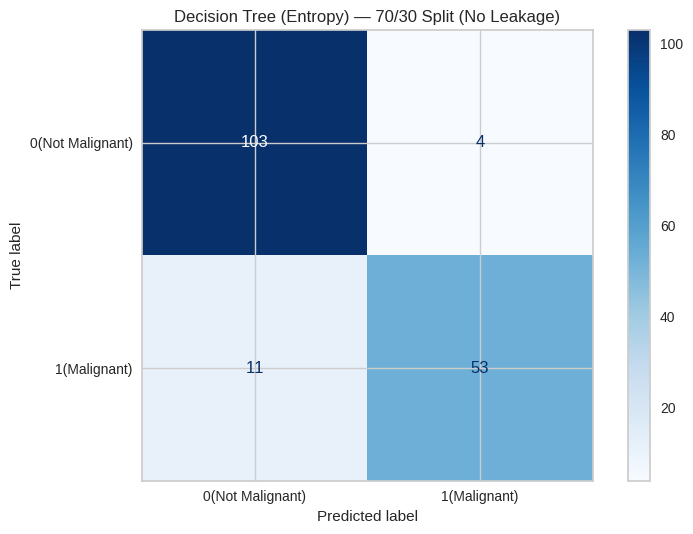

In [40]:
# ===== [5] Evaluation =====
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n", cm)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0(Not Malignant)","1(Malignant)"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Decision Tree (Entropy) — 70/30 Split (No Leakage)")
plt.tight_layout()
plt.show()


In [41]:

accuracy   = metrics.accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

TP = cm[1, 1]; TN = cm[0, 0]; FP = cm[0, 1]; FN = cm[1, 0]
sensitivity = TP / (TP + FN) if (TP + FN) else 0.0  # recall
specificity = TN / (TN + FP) if (TN + FP) else 0.0
precision   = TP / (TP + FP) if (TP + FP) else 0.0
f1          = metrics.f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1:", f1)

Accuracy: 0.9122807017543859
Error Rate: 0.08771929824561409
Sensitivity: 0.828125
Specificity: 0.9626168224299065
Precision: 0.9298245614035088
F1: 0.8760330578512396


# Confusion Matrix Interpretation



# Decesion Tree

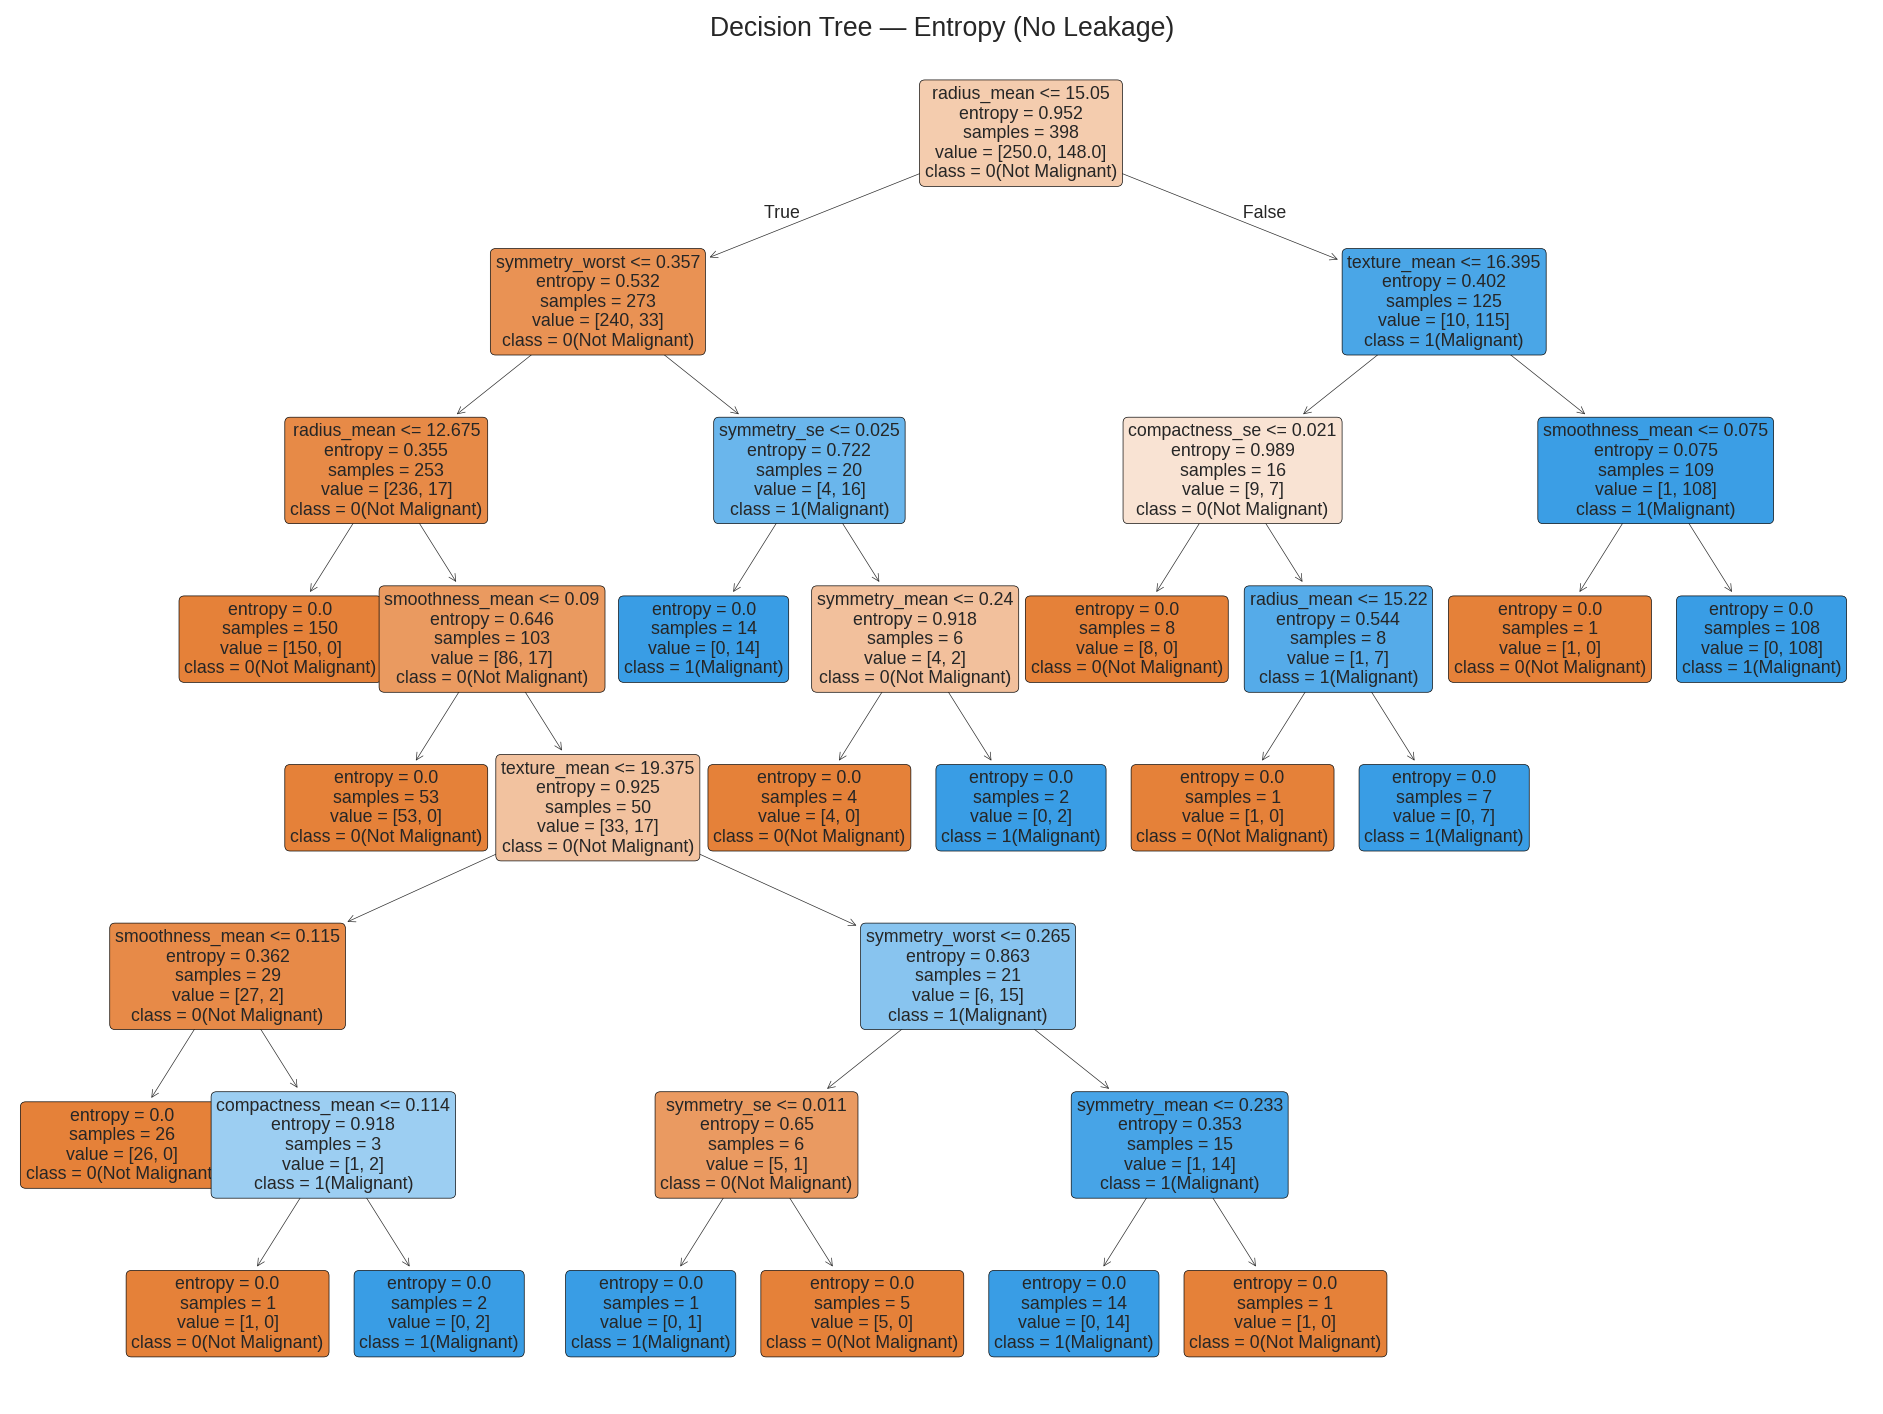

In [46]:

from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(12, 9), dpi=160)
plot_tree(
    clf,
    feature_names=X.columns.tolist(),
    class_names=["0(Not Malignant)", "1(Malignant)"],
    filled=True, rounded=True, impurity=True, fontsize=8
)
plt.title("Decision Tree — Entropy (No Leakage)")
plt.tight_layout()
plt.show()


